# Using Web APIs

An API, or Application Program Interface, allows one program to *talk* to another program. Many websites or services provide an API so you can query for information in an automated way. 

For mapping and spatial analysis, being able to use APIs is critical. For the longest time, Google Maps API was the most popular API on the web. APIs allow you to query web servers and get results without downloading data or running computation on your machine. 

Common use cases for using APIs for spatial analysis are

- Getting directions / routing
- Route optimization
- Geocoding
- Downloading data
- Getting real-time weather data
- ...

The provide of such APIs have many ways to implement an API. There are standards such as REST, SOAP, GraphQL etc. *REST* is the most populat standard for web APIs, and for geospatial APIs. REST APIs are used over HTTP and thus called web APIs.


## Understanding JSON and GeoJSON

JSON stands for **J**ava**S**cript **O**bject **N**otation. It is a format for storing and transporting data, and is the de-facto standard for data exchanged by APIs. GeoJSON is an extension of the JSON format that is commonly used to represent spatial data.

Python has a built-in `json` module that has methods for reading json data and converting it to Python objects, and vice-versa. In this example, we are using the `requests` module for querying the API which conveniently does the conversion for us. But it is useful to learn the basics of working with JSON in Python.

The GeoJSON data contains *features*, where each feature has some *properties* and a *geometry*. 

In [1]:
geojson_string = '''
{
  "type": "FeatureCollection",
  "features": [
    {"type": "Feature",
      "properties": {"name": "San Francisco"},
      "geometry": {"type": "Point", "coordinates": [-121.5687, 37.7739]}
    }
  ]
}
'''
print(geojson_string)


{
  "type": "FeatureCollection",
  "features": [
    {"type": "Feature",
      "properties": {"name": "San Francisco"},
      "geometry": {"type": "Point", "coordinates": [-121.5687, 37.7739]}
    }
  ]
}



To convert a JSON string to a Python object (i.e. parsing JSON), we can use the `json.loads()` method.

In [2]:
import json

data = json.loads(geojson_string) # convert (parse) to a dictionary

print(type(data))
print(data)

<class 'dict'>
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': 'San Francisco'}, 'geometry': {'type': 'Point', 'coordinates': [-121.5687, 37.7739]}}]}


Now that we have *parsed* the GeoJSON string and have a Python object, we can extract infromation from it. The data is stored in a *FeatureCollection* - which is a `list` of *features*, included within the square brackets [ ]. In our example, we have just 1 feature inside the feature collection, so we can access it by using index **0**.

In [3]:
city_data = data['features'][0]
print(city_data)

{'type': 'Feature', 'properties': {'name': 'San Francisco'}, 'geometry': {'type': 'Point', 'coordinates': [-121.5687, 37.7739]}}


### Accessing dictionaries using key names

The feature representation is a nested `dictionary`, from which individual items can be accessed using the `keys`.

In [4]:
city_feature = city_data['type'] 

city_name = city_data['properties']['name'] 

city_coordinates = city_data['geometry']['coordinates'] 

print(city_feature, city_name, city_coordinates)

Feature San Francisco [-121.5687, 37.7739]


## The `requests` module

To query a server, we send a **GET** request with some parameters and the server sends a response back. The `requests` module allows you to send HTTP requests and parse the responses using Python. 

The response contains the data received from the server. It contains the HTTP `status_code` which tells us if the request was successful. HTTP code `200` stands for `Sucess OK`.


In [5]:
import requests

response = requests.get('https://www.spatialthoughts.com')

print(response.status_code)

200


## Calculating Distance using OpenRouteService API

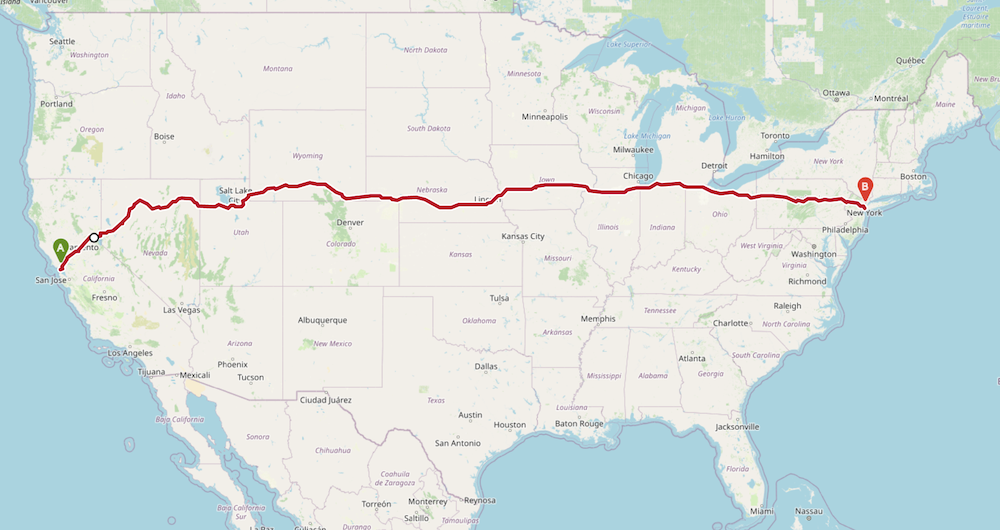

[OpenRouteService (ORS)](https://openrouteservice.org/) provides a free API for routing, distance matrix, geocoding, route optimization etc. using OpenStreetMap data. We will learn how to use this API through Python and get real-world distance between cities.

Almost all APIs require you to sign-up and obtain a *key*. The *key* is used to identify you and enforce usage limits so that you do not overwhelm the servers. We will obtain a key from OpenRouteServie so we can use their API

Visit [OpenRouteService Sign-up page](https://openrouteservice.org/dev/#/signup) and create an account. Once your account is activated, visit your Dashboard and request a token. Select *Standard* as the Token type and enter ``python_foundation`` as the Token name. Click *CREATE TOKEN*. Once created, copy the long string displayed under Key and enter below.

In [6]:
ORS_API_KEY = '5b3ce3597851110001cf624887990eaffad34abda73c4a4835b5da60'

We will use the OpenRouteServices's [Directions Service](https://openrouteservice.org/dev/#/api-docs/v2/directions/{profile}/get). This service returns the driving, biking or walking directions between the given origin and destination points.

In [7]:
import requests

san_francisco = (37.7749, -122.4194)
new_york = (40.661, -73.944)

parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(san_francisco[1], san_francisco[0]),
    'end' : '{},{}'.format(new_york[1], new_york[0])
}

response = requests.get(
    'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

if response.status_code == 200:
    print('Request successful.')
    data = response.json()
else:
    print('Request failed.')


Request successful.


We can read the `response` in JSON format by calling `json()` method on it.

In [8]:
data = response.json()

The response is a GeoJSON object representing the driving direction between the 2 points. See screenshot extract below :

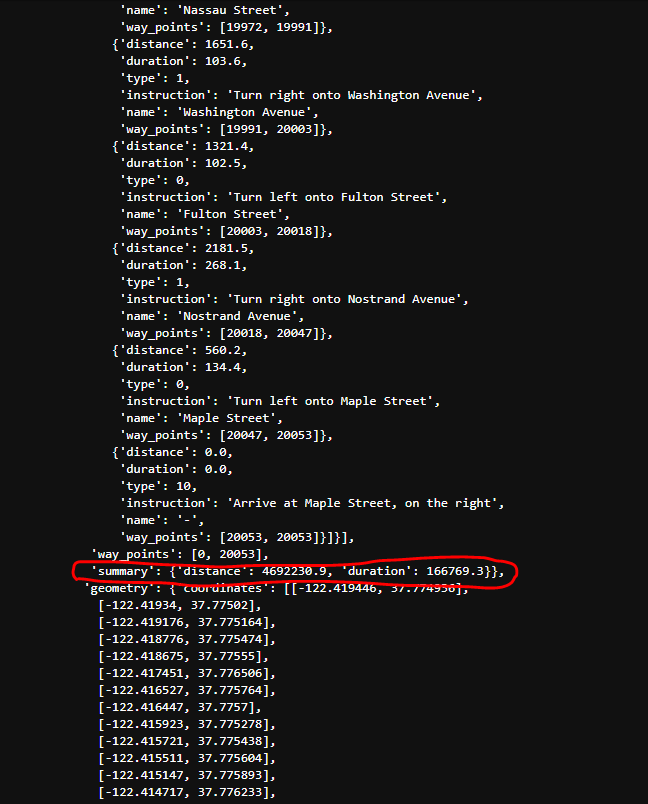

The object is a feature collection with just 1 feature. We can access it using the index **0**. The feature's property contains `summary` information which has the data we need. 

In [9]:
summary = data['features'][0]['properties']['summary']
print(summary)

{'distance': 4692230.9, 'duration': 166769.3}


We can then extract `distance` and convert it to kilometers.

In [10]:
distance = summary['distance']
print(distance/1000)

4692.2309000000005


You can compare this distance to the straight-line distance and see the difference.

## Exercise 1

Replace the `ORS_API_KEY` with your own key in the code below. Change the cities with your chosen cities and run the cell to see the summary of driving directions. Extract the values for `distance` (meters) and `duration` (seconds). Convert and print the driving distance in km and driving time in minutes.

In [ ]:
import requests

ORS_API_KEY = 'replace this with your key'

san_francisco = (37.7749, -122.4194)
new_york = (40.661, -73.944)

parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(san_francisco[1], san_francisco[0]),
    'end' : '{},{}'.format(new_york[1], new_york[0])
}

response = requests.get(
    'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

if response.status_code == 200:
    print('Request successful.')
    data = response.json()
else:
    print('Request failed.')

data = response.json()

summary = data['features'][0]['properties']['summary']
print(summary)

### My Solution 1

In [11]:
import requests

ORS_API_KEY = '5b3ce3597851110001cf624887990eaffad34abda73c4a4835b5da60'

origin_city = 'Kraków'
destination_city = 'Warsaw'

krakow = (50.049683, 19.944544)
warsaw = (52.237049, 21.017532)

parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(krakow[1], krakow[0]),
    'end' : '{},{}'.format(warsaw[1], warsaw[0])
}

response = requests.get(
    'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

if response.status_code == 200:
    print('Request successful.')
    data = response.json()
else:
    print('Request failed.')

data = response.json()

summary = data['features'][0]['properties']['summary']
print(summary)

Request successful.
{'distance': 293083.5, 'duration': 13699.4}


In [12]:
distance = summary['distance']
distance_km = round(distance/1000,2)

In [13]:
duration = summary['duration']
duration_min = round(duration/60)

In [14]:
print(f'The driving distance between {origin_city} and {destination_city} is {distance_km} kilometres and the estimated driving time is {duration_min} minutes.')

The driving distance between Kraków and Warsaw is 293.08 kilometres and the estimated driving time is 228 minutes.


## API Rate Limiting

Many web APIs enforce *rate limiting* - allowing a limited number of requests over time. With computers it is easy to write a for loop, or have multiple programs send hundrends or thousands of queries per second. The server may not be configured to handle such volume. So the providers specify the limits on how many and how fast the queries can be sent. 

OpenRouteService lists several [API Restrictions](https://openrouteservice.org/plans/). The free plan allows for upto 40 direction requests/minute. 

There are many libraries available to implement various strategies for rate limiting. But we can use the built-in `time` module to implement a very simple rate limiting method.

### The `time` module

Python Standard Library has a `time` module that allows for time related operation. It contains a method `time.sleep()` which delays the execution of the program for the specified number of seconds.

In [15]:
import time
for x in range(10):
    print(x)
    time.sleep(1.5)

0
1
2
3
4
5
6
7
8
9


## Exercise 2

Below cell contains a dictionary with 3 destination cities and their coordinates. Write a `for` loop to iterate over the `destination_cities` dictionary and call `get_driving_distance()` function to print real driving distance between San Fransico and each city. Rate limit your queries by adding `time.sleep(2)` between successive function calls. Make sure to replace the `ORS_API_KEY` value with your own key.

In [16]:
import csv
import os
import requests
import time
ORS_API_KEY = '5b3ce3597851110001cf624887990eaffad34abda73c4a4835b5da60'

def get_driving_distance(source_coordinates, dest_coordinates):
    
    parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(source_coordinates[1], source_coordinates[0]),
    'end' : '{},{}'.format(dest_coordinates[1], dest_coordinates[0])
    }

    response = requests.get(
        'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

    if response.status_code == 200:
        data = response.json()
        summary = data['features'][0]['properties']['summary']
        distance = summary['distance']
        return distance/1000
    
    else:
        print('Request failed.')
        return -9999

In [22]:
san_francisco = (37.7749, -122.4194)

destination_cities = {
    'Los Angeles': (34.0522, -118.2437),
    'Boston': (42.3601, -71.0589),
    'Atlanta': (33.7490, -84.3880)
   }

## My Solution

In [23]:
for city in destination_cities:
    driving_distance = get_driving_distance(destination_cities[city], san_francisco)
    print(f'The driving distance between San Francisco and {city} is {driving_distance} km.')
    time.sleep(2)         

The driving distance between San Francisco and Los Angeles is 616.3295 km.
The driving distance between San Francisco and Boston is 4984.9676 km.
The driving distance between San Francisco and Atlanta is 3976.8135 km.
